In [ ]:
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd             

In [ ]:
!pip install scikit-learn

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Test Accuracy: 0.7597


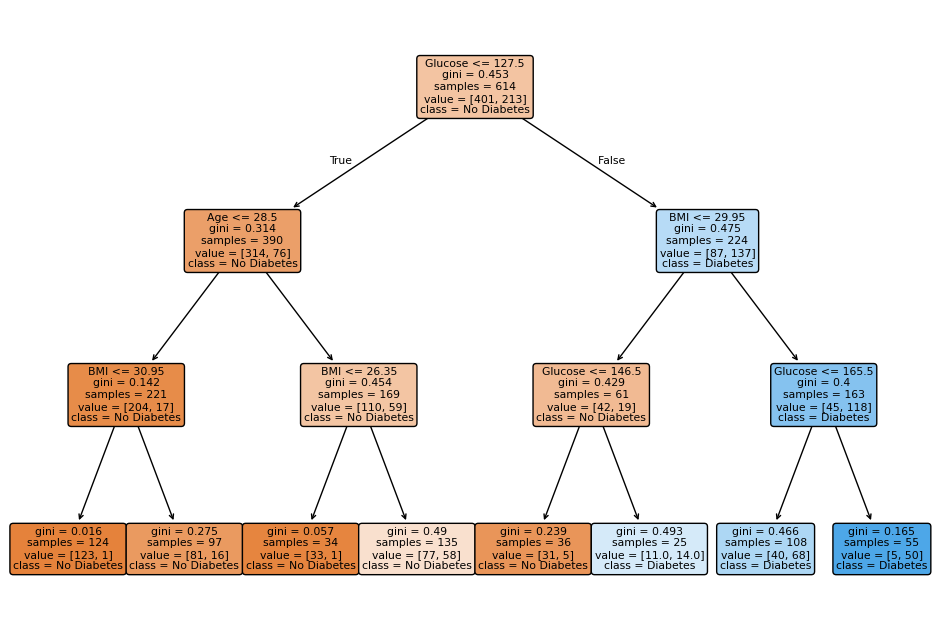

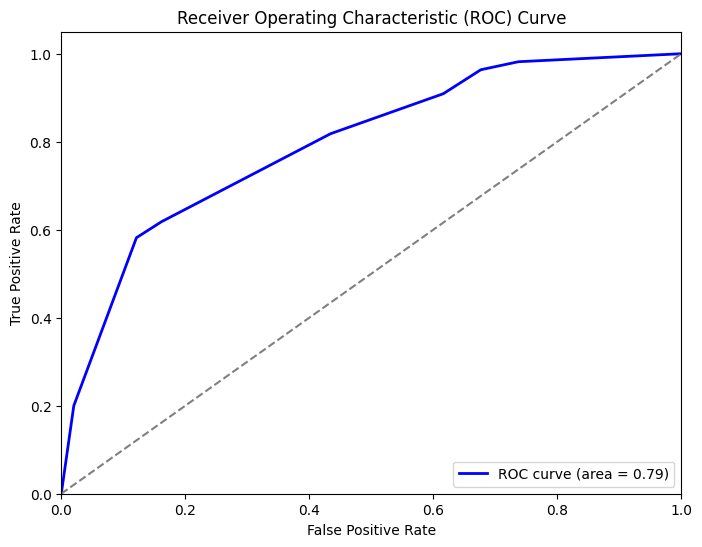

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc

# Load the dataset
df = pd.read_csv("diabetes.csv")

#Features
X = df[["Glucose", "BloodPressure", "BMI", "Age"]]
y = df["Outcome"]

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Parameters tuning
param_grid = {
    'max_depth': [3, 5, 10, 12],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the final model
best_params = grid_search.best_params_
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.show()

# Compute ROC curve and AUC
y_score = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
